# Parse and Plot Example ESP32 CSI Data

## Import Required Modules

In [1]:
# Import ESP32 CSI Parser to read CSI data collected using 'ESP32 CSI toolkit'
import csiparser

# Import Matplotlib to plot amplitude and phase from CSI data
%matplotlib inline
import matplotlib.pyplot as plt

# Import Numpy for scalling plot axis
import numpy as np

## Read Example CSI and Retrive Amplitude and Phase Information

This example CSI file depicts the distortion in amplitude and phase shift when a user walks between a pair of ESP32 devices.

In [2]:
# Using the ESP32 CSI parser we perform the following,
# 1. Read the example CSI file as Pandas Dataframe
# 2. Filter signals by High Throughput (HT) 40 Mhz (1 - HT and 0 - Non-HT)
# 3. Parse CSI string to Numpy Array
# 4. Remove NULL Subcarriers (view README.md for more information)
# 5. Calculate Amplitude and Phase from CSI
example_csi = (
    csiparser.ESP32("../esp32_dataset/example_csi.csv")
             .filter_by_sig_mode(1)
             .get_csi()
             .remove_null_subcarriers()
             .get_amplitude_from_csi()
             .get_phase_from_csi()
)

# Retrive amplitude and phase
amplitude_clean = example_csi.amplitude
phase_clean = example_csi.phase

## Plot Example Amplitude and Phase

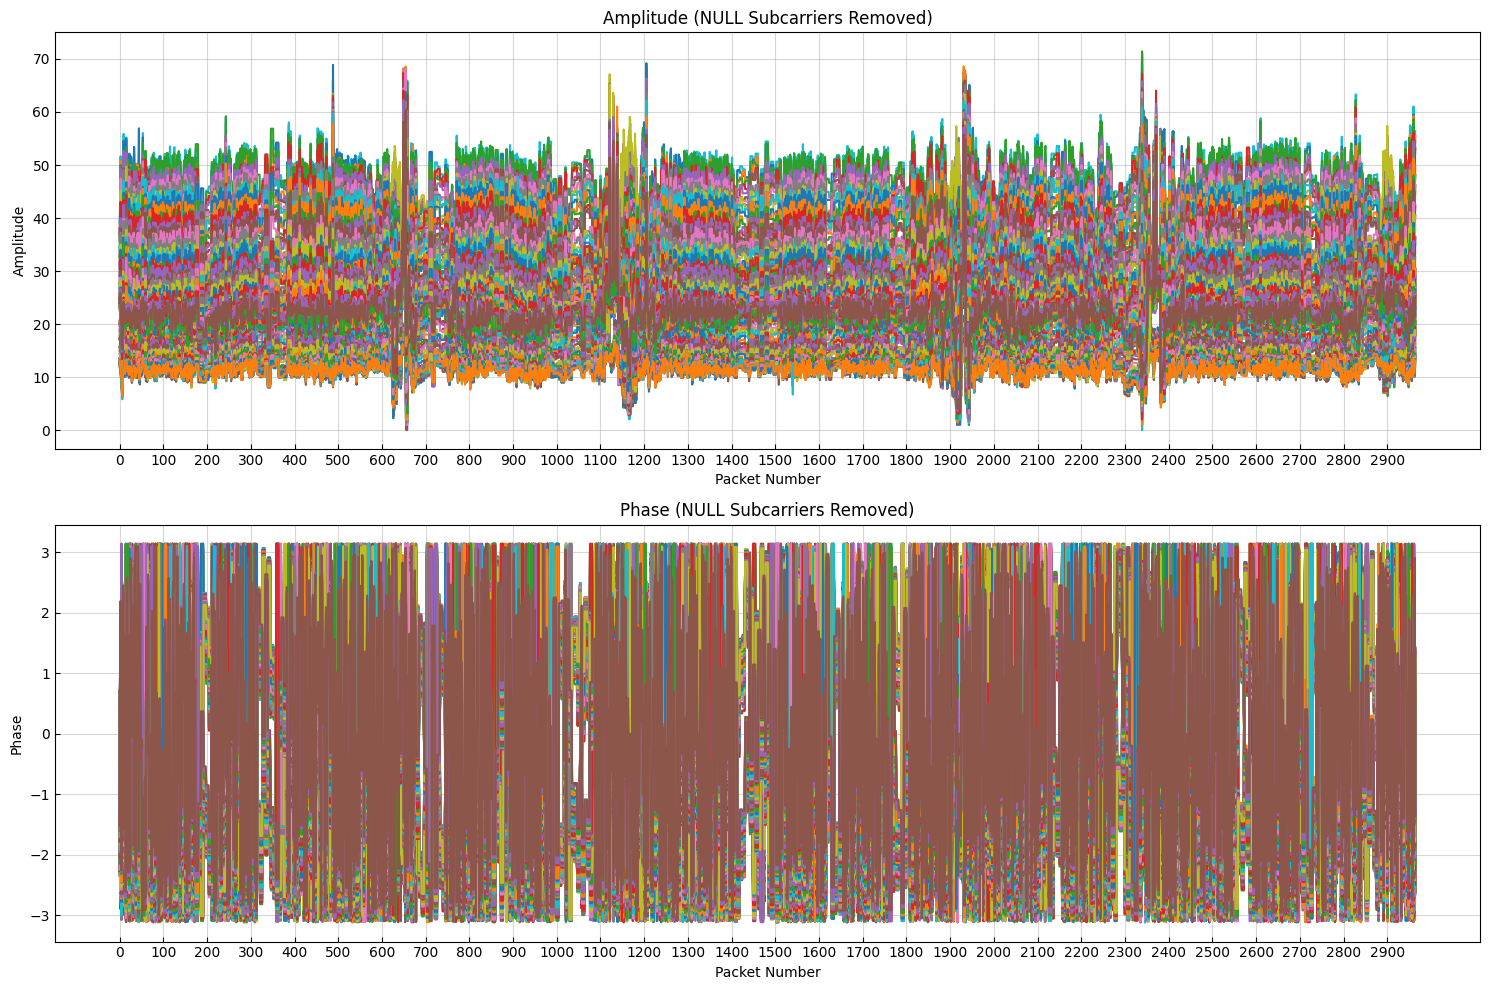

In [3]:
plt.style.use('default')

amp_x = [i for i in range(amplitude_clean.shape[0])]
phase_x = [i for i in range(phase_clean.shape[0])]

fig, ax = plt.subplots(2, 1)
ax[0].plot(amp_x, amplitude_clean)
# ax[0].plot(amp_x, 20*np.log10(np.abs(amplitude_clean)))

ax[0].set(xlabel='Packet Number', ylabel='Amplitude',
       title='Amplitude (NULL Subcarriers Removed)')
ax[0].grid()
ax[0].tick_params(direction='in', grid_alpha=0.5)
ax[0].set_xticks(np.arange(0, len(amp_x)+1, 100))


ax[1].plot(phase_x, phase_clean)

ax[1].set(xlabel='Packet Number', ylabel='Phase',
       title='Phase (NULL Subcarriers Removed)')
ax[1].grid()
ax[1].tick_params(direction='in', grid_alpha=0.5)
ax[1].set_xticks(np.arange(0, len(phase_x)+1, 100))

fig.set_figheight(10)
fig.set_figwidth(15)
fig.savefig("example_amplitude_and_phase_graph.png")

plt.tight_layout()
plt.show()